# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /Users/rushikesh/python_files/vscode/transformer/src/main/python/

/Users/rushikesh/python_files/vscode/transformer/src/main/python


In [3]:
import torch
import numpy as np
import pandas as pd

torch.set_printoptions(
    precision=2,     # number of decimals
    linewidth=120,   # max characters per line
    sci_mode=False   # disable scientific notation
)


In [4]:


loss_fn = torch.nn.CrossEntropyLoss()

from utils.Embeddings.Embeddings import Embeddings
from utils.Attention.Attention import attentionLayer
from utils.Attention.Attention import multiHeads
from utils.Attention.Attention import residualConnection
from utils.FFN.FFN import feedForward
from utils.Tokenizer.Tokenizer import SimpleTokenizer



# Data

In [5]:
with open("data/Text.txt", 'r') as f:
    text = f.read()

In [6]:
words = text.lower().split(" ")

In [7]:
import re

def clean_words(word_list):
    cleaned = []
    for word in word_list:
        word_lower = word.lower()  # convert to lowercase
        if re.fullmatch(r"[a-z]+", word_lower) and (len(word_lower) >=4) and (len(word_lower) <= 8) :
            cleaned.append(word_lower)
    return cleaned


In [8]:
words = clean_words(words)

In [9]:
import random

def prepare_training_example(word, tokenizer, max_len=8, mask_prob=0.5):
   
    padded_word = list(word) + ['<e>' for i in range(max_len - len(word))]
    
    x_chars = padded_word[::]

    for i in range(len(x_chars)):
        if x_chars[i] != '<e>' and (x_chars[i] != '<s>') and random.random() < mask_prob:
            x_chars[i] = '<mask>'
    
    x_encoded = tokenizer.encode(x_chars, pad=True)
    y_encoded = tokenizer.encode(list(padded_word), pad=True)
    
    return x_encoded, y_encoded


In [10]:
## each char is a 
sequence   = 'mango'

Tokenizer  = SimpleTokenizer(list('abcdefghijklmnopqrstuvwxyz'))

x          = Tokenizer.encode(sequence, pad = True)

In [11]:
import random

X, Y = [], []

for word in words:
    # Choose a random mask probability for this example
    # mask_prob = random.uniform(0.1, 0.8)  # e.g., 10% to 80% masked
    u = random.random()
    mask_prob = 0.1 + (0.8 - 0.1) * (1 - u**2)  # favor smaller mask fraction
    
    x, y = prepare_training_example(word, Tokenizer, max_len=8, mask_prob=mask_prob)
    
    X.append(x)
    Y.append(y)


In [12]:
len(X), len(Y)

(96634, 96634)

In [13]:
X[100], Y[100]

(tensor([[ 0, 19, 13,  1, 28, 12, 27, 27, 27, 27]]),
 tensor([[ 0, 19, 13,  1, 12, 12, 27, 27, 27, 27]]))

In [14]:
i = random.randint(1, len(X))

Tokenizer.decode(X[i]), Tokenizer.decode(Y[i])

('<s><mask>innin<mask><e><e>', '<s>winning<e><e>')

# Model

In [15]:
seq_len    = 10
vocab_size = 29
d_model    = 4 ## d_model should be even for positiona encodings to work

## emb is embeddings class which takes the encoded sequence as the input and returns the (token + pos) encodings
emb        = Embeddings(vocab_size = vocab_size, d_model= d_model, max_len= seq_len)
multiHeadLayer = multiHeads(num_heads = 2, 
                            d_model   = d_model, 
                            max_len   = seq_len)
rc = residualConnection()
FFN = feedForward(d_model = 4, max_len = seq_len, vocab_size = vocab_size)

x = X_tensor[:2]
y = Y_tensor[:2]

x0    = emb(x).squeeze(1)

x1 = multiHeadLayer(x0)

x2 = rc(x0, x1)

x3  = FFN(x2)

# ----- LOSS -----
logits  = x3
targets = y       

loss = loss_fn(
    logits.view(-1, logits.size(-1)),   # (B*T, V)
    targets.view(-1)                    # (B*T)
)

loss.backward()

NameError: name 'X_tensor' is not defined

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# --- Hyperparameters ---
seq_len    = 10
vocab_size = 29
d_model    = 16
num_epochs = 5000
learning_rate = 0.0001


emb        = Embeddings(vocab_size = vocab_size, d_model= d_model, max_len= seq_len)
multiHeadLayer = multiHeads(num_heads = 2, 
                            d_model   = d_model, 
                            max_len   = seq_len)
rc = residualConnection()
FFN = feedForward(d_model = d_model, max_len = seq_len, vocab_size = vocab_size)

# --- Assume these are your prepared training examples ---
# X: list of tensors (B, T)
# Y: list of tensors (B, T)
# Convert to tensors
X_tensor = torch.stack(X)  # shape: (B, T)
Y_tensor = torch.stack(Y)  # shape: (B, T)

# --- Loss and optimizer ---
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(emb.parameters() +
                    #    multiHeadLayer.parameters() +
                       FFN.parameters(),
                       lr=learning_rate)



Epoch [100/5000], Loss: 3.3869
Epoch [200/5000], Loss: 3.3745
Epoch [300/5000], Loss: 3.3626
Epoch [400/5000], Loss: 3.3580
Epoch [500/5000], Loss: 3.3596
Epoch [600/5000], Loss: 3.3578
Epoch [700/5000], Loss: 3.3560
Epoch [800/5000], Loss: 3.3567
Epoch [900/5000], Loss: 3.3559
Epoch [1000/5000], Loss: 3.3552
Epoch [1100/5000], Loss: 3.3577
Epoch [1200/5000], Loss: 3.3553
Epoch [1300/5000], Loss: 3.3539
Epoch [1400/5000], Loss: 3.3525
Epoch [1500/5000], Loss: 3.3532
Epoch [1600/5000], Loss: 3.3532
Epoch [1700/5000], Loss: 3.3525
Epoch [1800/5000], Loss: 3.3507
Epoch [1900/5000], Loss: 3.3515
Epoch [2000/5000], Loss: 3.3506
Epoch [2100/5000], Loss: 3.3498
Epoch [2200/5000], Loss: 3.3513
Epoch [2300/5000], Loss: 3.3509
Epoch [2400/5000], Loss: 3.3519
Epoch [2500/5000], Loss: 3.3508
Epoch [2600/5000], Loss: 3.3516
Epoch [2700/5000], Loss: 3.3513
Epoch [2800/5000], Loss: 3.3511
Epoch [2900/5000], Loss: 3.3521
Epoch [3000/5000], Loss: 3.3520
Epoch [3100/5000], Loss: 3.3506
Epoch [3200/5000]

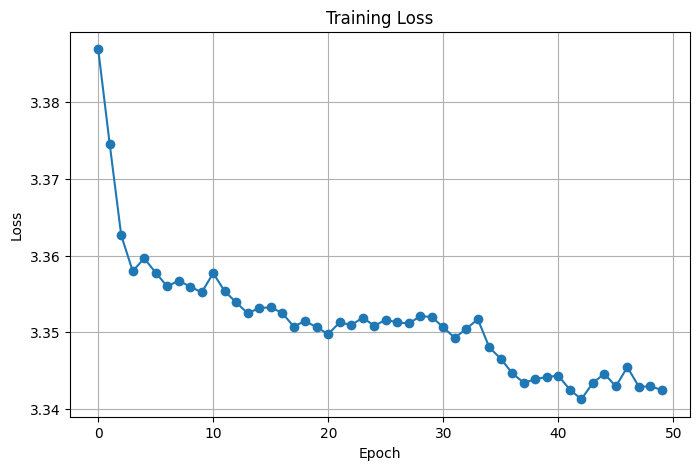

In [17]:

# --- Training loop ---
loss_history = []

for epoch in range(num_epochs):
    optimizer.zero_grad()

    idx  = random.sample(range(len(words)), 5000)

    X_idx = X_tensor[idx].squeeze(1)
    Y_idx = Y_tensor[idx].squeeze(1)

    
    # Forward pass
    x0 = emb(X_idx)
    x1 = multiHeadLayer(x0)
    x2 = rc(x0, x1)
    x3 = FFN(x2)
    
    logits = x3
    targets = Y_idx
    
    # Compute loss
    loss = loss_fn(
        logits.view(-1, logits.size(-1)),  # (B*T, V)
        targets.view(-1)                    # (B*T)
    )
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        loss_history.append(loss.item())

# --- Plot loss ---
plt.figure(figsize=(8,5))
plt.plot(loss_history, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [ ]:
len(x1), x1[0].shape, x1[1].shape

In [ ]:
torch.arange(2 * 2).view(2,2)[:, 1]

In [ ]:
indices = torch.arange(2 * 2).view(2, 2)[:, 0]   # (B,)
indices

In [ ]:
torch.cat(x1, dim = -1).shape, x0.shape

In [ ]:
print("X:", X_tensor.squeeze(1).shape)
x0 = emb(X_tensor.squeeze(1)[:2])
print("x0:", x0.shape)
x1 = multiHeadLayer(x0)
print("x1:", x1.shape)
x2 = rc(x0, x1)
print("x2:", x2.shape)
x3 = FFN(x2)
print("x3:", x3.shape)


In [ ]:
x0.shape, x1.shape

In [ ]:
print(x1[0])
print(x1[1])

In [ ]:
print(torch.cat(x1, -1))

In [ ]:
x = X_tensor[0]
y = X_tensor[0]

x0    = emb(x)

x1 = multiHeadLayer(x0)

x2 = rc(x0, x1)

x3  = FFN(x2)

Tokenizer.decode(x3.argmax(dim = 2))


In [ ]:
X_tensor[[1,2]]

In [ ]:
## plot positional encodings to understand 

emb.plot_positional_encodings()

In [ ]:
x, x0, x1

In [ ]:
emb.pos_emb.shape

In [ ]:
emb.pos_emb[:5, :]

In [ ]:
x.shape, x0.shape, x1.shape

In [ ]:
rc(x0, x1)

In [ ]:
x1

In [ ]:
rc(x0, x1)

In [ ]:
x2.shape

In [ ]:
x3.shape

In [ ]:
x3.sum(dim = 2)